## Examen Final Probabilidad y Estadística para Inteligencia Artificial

Abril 2021

In [1]:
import matplotlib.pyplot as plt
from scipy import stats
import math as mt

### Ejercicio 1
<p style='text-align: justify;'>
Jerónimo y Marcelo juegan un partido de ta-te-tí. Si la primera jugada la hace Marcelo, la probabilidad de que gane el partido es de 0.8, mientras que si comienza Jerónimo es de 0.5. Para elegir quien comienza el juego, lanzan una moneda equilibrada 4 veces y si se observa una cantidad de caras mayor a la de
cecas, el juego lo comieza Jerónimo.
</p>

a) Si se sabe que Marcelo fue el ganador del partido, hallar es la probabilidad de haber observado un número impar de caras.

b) Simular el juego 1000 veces y estimar la probabilidad de que Marcelo gane el partido.

c) En base a las simulaciones del item previo, verificar el resulado teórico del item a)
</p>

#### Desarrollo:
<p style='text-align: justify;'>
    
$M$ = evento Marcelo gana
    
$J$ = evento Jerónimo gana
    
$m$ = evento Marcelo comienza
    
$j$ = evento Jerónimo comienza
    
$P(M|m) = 0.8$

$P(J|m)=0.2$
    
$P(M|j) = 0.5$
    
$P(J|j)=0.5$
       
X = exitos en tiradas de moneda (cara). P(X = cara) = 0.5 ya que es una moneda balanceada.   
</p>

In [2]:
# DATOS DEL PROBLEMA
pMm = 0.8   # Probabilidad de que gane Marcelo habiendo empezado Marcelo
pJm = 0.2   # Probabilidad de que gane Jeronimo habiendo empezado Marcelo
pMj = 0.5   # Probabilidad de que gane Marcelo habiendo empezado Jeronimo
pJj = 0.5   # Probabilidad de que gane Jeronimo habiendo empezado Jeronimo

# PROBABILIDADES DE ARRANQUE DE PARTIDA
n = 4       # Tiradas total de monedas
p = 0.5     # Moneda balanceada

<p style='text-align: justify;'>
    a) ¿$P(X=impar|M)$?
</p>

<p style='text-align: center;'>
    $P(X=impar|M) = P(X=1|M) + P(X=3|M)$
</p>

<p style='text-align: justify;'>
Por formula de bayes podemos escribir:
</p>

<p style='text-align: center;'>
    $P(X=impar|M) = \frac {P(X=1) . P(M|X=1)}{P(M)}  + \frac {P(X=3) . P(M|X=3)} {P(M)}$
</p>

<p style='text-align: justify;'>
Por lo que tenemos los siguientes términos:
</p>

- $P(M)$ calculable a partir de los datos del problema.

- $P(X=1)$ y $P(X=3)$ son desconocidos que pueden calcularse con la binomial. Esto es posible porque es indistinto el orden de las tiradas.

- $P(M|X=1) = P(M|m) = 0.8$ dato del problema.

- $P(M|X=3) = P(M|j) = 0.5$ dato del problema.



$P(M)$:
<p style='text-align: justify;'>
La probabilidad de que gane Marcelo la puedo descomponer de la siguiente manera:
</p>

<p style='text-align: center;'>
    $P(M) = P(M|m) . P(m) + P(M|j) . P(j)$
</p>

<p style='text-align: justify;'>
    Donde $P(m) = 1 - P(j)$.
</p>

<p style='text-align: center;'>
    $P(M) = P(M|m) . (1 - P(j)) + P(M|j) . P(j)$
    $P(M) = P(M|m) - P(M|m) P(j) + P(M|j) . P(j)$
    $P(M) = P(M|m) + (P(M|j) - P(M|m)) P(j)$
    $P(M) = 0.8 + (0.5 - 0.8) P(j)$
    $P(M) = 0.8 + 0.3 P(j)$
</p>

<p style='text-align: justify;'>
    $P(j)$ puede escribirse como:
</p>
<p style='text-align: center;'>
    $P(j) = P(X>2) = 1 - P(X\leqslant2) $
</p>

<p style='text-align: justify;'>
    Es decir, que es igual a la probabilidad de que en las 4 tiradas la mayoria sean caras. Esto lo calculamos a través de la siguiente linea de codigo:
</p>

In [3]:
# PROBABILIDAD ACUMULADA DE QUE HAYA 3 O 4 CARAS, ES DECIR, LA PROBABILIDAD
# DE QUE ARRANQUE LA PARTIDA JERONIMO => 1 - P(X <= 2 )
k = 2       # Tiradas con exito, en este caso sale cara
pj = 1 - stats.binom.cdf(k, n, p) #   Probabilidad de que arranque Jeronimo

print('La probabilidad de que arranque Jeronimo es ', pj)

pm = 1 - pj     # Probabilidad de que arranque Marcelo
print('La probabilidad de que arranque Marcelo es ', pm)

La probabilidad de que arranque Jeronimo es  0.3125
La probabilidad de que arranque Marcelo es  0.6875


<p style='text-align: justify;'>
Por lo tanto, llegamos a que:
</p>
<p style='text-align: center;'>
    $P(M) = 0.8 + 0.3 0.3125 = 0.70625$
</p>

$P(X=1)$ y $P(X=3)$:
<p style='text-align: justify;'>
Como ya se ha mencionado se utilizará la expresión binomial para el calculo de las probabilidades de las distintas cantidades caras que nos interesan que salgan. Esta expresión es:
</p>

<p style='text-align: center;'>
    $P(X = i) = {n \choose i} p^{i} (1-p)^{n-i}$
</p>

<p style='text-align: justify;'>
Donde n=4 que son las cantidad de tiradas. Esto resulta:
</p>

<p style='text-align: center;'>
    $P(X = 1) = {4 \choose 1} 0.5^{1} (1-0.5)^{4-1} = 0.25$
</p>

<p style='text-align: center;'>
    $P(X = 3) = {4 \choose 3} 0.5^{3} (1-0.5)^{4-3} = 0.25$
</p>

In [4]:
# CALCULO DE pj CON LA PROBABILITY MASS FUNCTION
# x1 = binom.pmf(3,4,0.5)
# x2 = binom.pmf(4,4,0.5)
# pj2 = x1 + x2

# probabilidad de 1 cara
px1 = stats.binom.pmf(1,n,p)

# probabilidad de 3 caras
px3 = stats.binom.pmf(3,n,p)

print('\nLa probabilidad de que salga 1 cara es', px1)
print('La probabilidad de que salgan 3 caras es ', px3)
print('La probabilidad de que salga un nro impar de caras es', px1+px3)


La probabilidad de que salga 1 cara es 0.25000000000000006
La probabilidad de que salgan 3 caras es  0.25000000000000006
La probabilidad de que salga un nro impar de caras es 0.5000000000000001


Finalmente:

<p style='text-align: center;'>
    $P(X=impar|M) = \frac {P(X=1) . P(M|X=1)}{P(M)}  + \frac {P(X=3) . P(M|X=3)} {P(M)} = \frac {0.25 x 0.8}{0.70625}  + \frac {0.25 x 0.5} {0.70625} $
    $P(X=impar|M) = 0.4602$
</p>

In [5]:
# PROBABILIDADES DE GANAR
p_gana_M = 0.8 - 0.3 * pj      # Probabilidades de que gane Marcelop 
                               # Calculado como pMm * pm + pMj * pj

p_gana_J = 1 - p_gana_M        # Probabilidades de que gane Jeronimo

p_ximpar_ganamarcelo = ((px1 * pMm)/p_gana_M) + ((px3 * pMj)/p_gana_M)

print('La probabilidad de que gane Marcelo es', p_gana_M)
print('La probabilidad de que gane Jeronimo es', p_gana_J)
print('La probabilidad de que el numero de caras haya sido impar, habiendo ganado marcelo es', p_ximpar_ganamarcelo)

La probabilidad de que gane Marcelo es 0.70625
La probabilidad de que gane Jeronimo es 0.29374999999999996
La probabilidad de que el numero de caras haya sido impar, habiendo ganado marcelo es 0.4601769911504425


In [6]:
#******************************************************************
#   SIMULACION DEL EJERCICIO
#******************************************************************

N = 10000
marcelo = 0
jeronimo = 0
ximpar_marcelo = 0
victorias_marcelo = 0

for simulacion in range(N):
    
    # Simulacion de 4 tiradas de moneda
    caras = stats.binom.rvs(4, 0.5, size=1)
    
    if (caras >= 3):
        gana_marcelo = stats.binom.rvs(1, 0.5, size=1)
    elif (caras < 3):
        gana_marcelo = stats.binom.rvs(1, 0.8, size=1)
    
    if gana_marcelo == 1:
        marcelo += 1
        if (caras==3)|(caras==1):
            ximpar_marcelo += 1
        victorias_marcelo += 1
    else:
        jeronimo += 1

    
p_marcelo = marcelo / N
p_jeronimo = jeronimo / N
p_ximp_marc_sim = ximpar_marcelo / victorias_marcelo

print('La probabilidad de que gane Marcelo es', p_marcelo)
print('La probabilidad de que gane Jeronimo es', p_jeronimo)
print('La probabilidad de que el numero de caras haya sido impar, habiendo ganado marcelo es', p_ximp_marc_sim)

La probabilidad de que gane Marcelo es 0.704
La probabilidad de que gane Jeronimo es 0.296
La probabilidad de que el numero de caras haya sido impar, habiendo ganado marcelo es 0.4578125


### Ejercicio 2
<p style='text-align: justify;'>
La producción de gasolina mensual (en m3) en Neuquén sigue una distribución normal de media 95529 y desvío estándar 30127, mientras que la de Santa Cruz sigue una distribución también normal pero de media 8268 y desvío estándar 2481.
    
a) Hallar la probabilidad de que la producción total entre Neuquén y Santa Cruz de un mes supere los 142925 $m^3$.
    
b) Hallar la probabilidad de que en un mes la producción de Neuquén sea 10 veces más grande que la de Santa Cruz.
    
c) Si cada barril de gasolina tiene una capacidad de 159 l (0,159 $m^3$), hallar la cantidad mínima de barriles necesarios para almacenar la producción de gasolina de Santa Cruz de un mes con 95 % de probabilidad.
    
d) Simular el experimento y verificar los resultados obtenidos en los puntos a), b) y c).
</p>

In [7]:
#*******************************
#   Datos del problema
#*******************************
mun, sigman = 95529, 30127  # media y desvio de Neuquén
musc, sigmasc = 8268, 2481  # media y desvio de Santa Cruz

capacidad_barril = 0.159 # Capacidad de barril en m3

Text(0.5, 1.0, 'Santa Cruz')

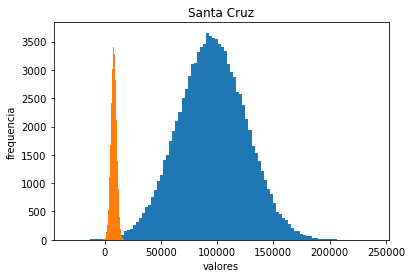

In [8]:
#*******************************
#   Inicializacion de variables
#*******************************

prod_neuquen = stats.norm.rvs(mun, sigman, size=100000)
prod_santacruz = stats.norm.rvs(musc, sigmasc, size=100000)

plt.hist(prod_neuquen, 100)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Neuquen')

plt.hist(prod_santacruz, 100)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Santa Cruz')

# varianzan = prod_neuquen.var()
# median = prod_neuquen.mean()
# varianzasc = prod_santacruz.var()
# mediasc = prod_santacruz.mean()

<p style='text-align: justify;'>
a) $¿P(N + S > 142925)?$
    
Donde N es la v.a. de la producción de Neuquén y S la de Santa Cruz.

Defino la producción total:
</p>
<p style='text-align: center;'>
    $T = N + S$
    
</p>
<p style='text-align: justify;'>
Como las producciones de ambas provincias son independientes entre si, podemos escribir:
    
$E[T] = \mu_{T} = \mu_{N} + \mu_{S}$

$\sigma[T] = \sigma[N] + \sigma[S]$
    
$T \sim N (103797, 913791490)$
    
</p>

<p style='text-align: justify;'>

</p>

In [9]:
puntoa_teorico = 1 - stats.norm.cdf((142925-(mun+musc))/(mt.sqrt(sigman**2+sigmasc**2)))
print(f"La probabilidad de que la produccion total sea mayor a 142925 m3 es de: {puntoa_teorico}")

La probabilidad de que la produccion total sea mayor a 142925 m3 es de: 0.09776591372037358


<p style='text-align: justify;'>
b) $¿P(N \geq 10*S)?$
    
$P(N \geq 10*S) = P(N - 10*S \geq 0) $    

Definimos:

$ Y = N - 10*S$
</p>

<p style='text-align: justify;'>
Por lo tanto:
    
$E[Y] = \mu_{Y} = \mu_{N} + 10 * \mu_{S}$

$\sigma[Y] = \sigma[N] + 100 * \sigma[S]$
    
$Y \sim N (12849, 1523172229)$
</p>

<p style='text-align: justify;'>

$P(N \geq 10*S) = 1 - P(Y < 0)$

Normalizo para utizar la funcion "norm.cdf" y calcular la probabilidad:
    
$P(N \geq 10*S) = 1 - P(y < \frac {-12849}{\sqrt{1523172229}})$
    
$P(N \geq 10*S) = 0.629$
</p>

In [10]:
puntob_teorico = 1 - stats.norm.cdf((-mun+10*musc)/(mt.sqrt(sigman**2+100*sigmasc**2)))
print(f"La probabilidad de que la produccion de Neuquén sea al menos 10 veces mayor a la de Santa Cruz es: {puntob_teorico}")

La probabilidad de que la produccion de Neuquén sea al menos 10 veces mayor a la de Santa Cruz es: 0.6290077636227774


c) $¿P(\bar{S} \leq s)=0.95?$
    
$\bar{S} \sim N (8268, 2481)$

Definimos:

$\hat{S} = \frac{\bar{S} - \mu_\bar{S}}{\sigma_\bar{S}}$, tal que $\hat{S} \sim N (0, 1)$
</p>

<p style='text-align: justify;'>
$P(\hat{S} \leq s') = 0.95$

A s' lo calculamos con octave: s' = norminv(0.95) = 1.6449

$P(\frac{\bar{S} - \mu_\bar{S}}{\sigma_\bar{S}} \leq 1.6449) = 0.95$  
    
$P(\bar{S} \leq (1.6449*\sigma_\bar{S}) + \mu_\bar{S}) = 0.95$
    
$P(\bar{S} \leq (1.6449*2481) + 8268) = 0.95$

$P(\bar{S} \leq 12348.9969) = 0.95$
    
Barriles necesarios = 12348.9969 / 0.159 = 77666.65 => 77667 Barriles
</p>

d) Simulacion

In [11]:
#*******************************
#   Calculos y simulacion
#*******************************
n = 10000      #   Muestras a evaluar
puntoa, puntob, puntoc = 0, 0, 0

e = 0.0001
puntoc2 = 0

for muestra in range(n):
    if prod_neuquen[muestra]+prod_santacruz[muestra]>142925:
        puntoa += 1
    if prod_neuquen[muestra]>=10*prod_santacruz[muestra]:
        puntob += 1

#   Se prueban dos calculos practicos de calcular el nro de barriles
    if ((stats.norm.cdf((prod_santacruz[muestra]-musc)/sigmasc) <= 0.95-e)|(stats.norm.cdf((prod_santacruz[muestra]-musc)/sigmasc) <= 0.95+e)):
        if prod_santacruz[muestra] > puntoc:
            puntoc = prod_santacruz[muestra]
    if (stats.norm.cdf((prod_santacruz[muestra]-musc)/sigmasc) <= 0.95):
        if prod_santacruz[muestra] > puntoc2:
            puntoc2 = prod_santacruz[muestra]

puntoa = puntoa / n
puntob = puntob / n
puntoc = mt.ceil(puntoc / capacidad_barril)
puntoc2 = mt.ceil(puntoc2 / capacidad_barril)

print('\na) La probabilidad de que la produccion total de un mes entre Neuquen y Santa Cruz  supere los 142925 m3 es de:')
print('Valor teorico: ', puntoa_teorico)
print('Valor practico: ', puntoa)

print('\nb) La probabilidad de que en un mes la producci´on de Neuqu´en sea 10 veces m´as grande que la de Santa Cruz es de:')
print('Valor teorico: ', puntob_teorico)
print('Valor practico: ', puntob)

print('\nc) Cantidad minima de barriles necesarios para almacenar la produccion de gasolina de Santa Cruz de un mes con 95 % de probabilidad:')
print('Valor teorico: 77667')
print('Valor practico: ', puntoc)


a) La probabilidad de que la produccion total de un mes entre Neuquen y Santa Cruz  supere los 142925 m3 es de:
Valor teorico:  0.09776591372037358
Valor practico:  0.0904

b) La probabilidad de que en un mes la producci´on de Neuqu´en sea 10 veces m´as grande que la de Santa Cruz es de:
Valor teorico:  0.6290077636227774
Valor practico:  0.6282

c) Cantidad minima de barriles necesarios para almacenar la produccion de gasolina de Santa Cruz de un mes con 95 % de probabilidad:
Valor teorico: 77667
Valor practico:  77671


### Ejercicio 3
<p style='text-align: justify;'>
    Considere un problema de detección, donde se quiere detectar la presencia de una señal de amplitud constante desconocida A inmersa en ruido gaussiano aditivo blanco (AWGN) de media $0$ y varianza $σ^2$, también desconocida. Se tienen 10 mediciones de la señal recibida $Y = [Y [0], . . . , Y [9]]$.

a) Hallar un intervalo de confianza del 95 % para la media de amplitud recibida.

b) Si en las 10 mediciones se observó que el promedio $\hat{y} = 1,02962$ y el desvío muestral estándar es de 0,3838 , determinar si existe evidencia suficiente para asegurar que hay presencia de señal con un 5 % de significación (Ayuda: plantear como hipótesis nula que no se envió una señal, es decir A = 0).

c) Simular el experimento usando A = 1, σ = 0,4 y verificar los resultados obtenidos en los puntos a) y b).
</p>

In [12]:
#*******************************
#   Datos del problema
#*******************************
n_3 = 10  # Cantidad de muestras
A = 1   # Amplitud de la senal

alpha = 0.05

muw = 0         # Media del ruido
sigmaw = 0.4    # Desvio del estandar del ruido

#*******************************
#   Inicializaciones
#*******************************
N_3 = 10000
contador = 0

<p style='text-align: justify;'>
a) Dado que no conozco la varianza de la medición, utilizaré la varianza muestral para calcular el intervalo de confianza a través de la distribución de t-Student.

Media amplitud recibida: $\bar{y} = \frac{1}{10} * \sum \limits _{i=1} ^{N} y_i$
<p>
    
<p style='text-align: center;'>
$P(t_{1-\frac{\alpha}{2},N-1} < \frac{\bar{y}-A}{\frac{S}{\sqrt{N}}} < t_{\frac{\alpha}{2},N-1}) = 1- \alpha$, tal que, $1-\alpha = 0.95 => \alpha = 0.05$
    
    
<p>

In [13]:
# Calculo el t de student con percentil alpha/2 y n_3-1
t = stats.t.interval(1-alpha, n_3-1)
print(t)

(-2.2621571627409915, 2.2621571627409915)


<p style='text-align: center;'>
$t_{\frac{\alpha}{2},N-1} = t_{1-\frac{\alpha}{2},N-1} = 2.262$
<p>

<p style='text-align: center;'>
$P(-2.262 < \frac{A-\bar{y}}{\frac{S}{\sqrt{N}}} < 2.262) = 0.95$
<p>
<p style='text-align: center;'>
$P(\bar{y}-2.262*\frac{S}{\sqrt{N}} < A < \bar{y}-2.262*\frac{S}{\sqrt{N}}) = 0.95$
<p>

<p style='text-align: justify;'>
    La varianza muestral estimada por el estimador insesgado:
<p>
    
<p style='text-align: center;'>
    $S^2 = \frac{1}{N-1} \sum \limits _{i=1} ^{N} (y_i-\hat{y})^2$
<p>

<p style='text-align: justify;'>
b) $\bar{y} = 1.02962$ con $S=0.3838$
    
$P(A - \frac{2.262*S}{\sqrt{10}} < \bar{y} < A + \frac{2.262*S}{\sqrt{10}}) = 0.95 $
    
    En caso de que no hubiera se;al transmitida A=0 y la media muestral debería pertenecer al rango:
    
$P(-0.274 < \bar{y} < 0.274) = 0.95$
    
    para poder asegurar que hay un 95% de confianza en decir que no hay señal.
    
    Por lo tanto, es posible asegurar con un 5% de significancia que hay presencia de señal.
<p>

c) Simulación

In [14]:
#*******************************
#   Simulación
#*******************************

for simulacion in range(N_3):
    
    varianza_muestral = 0
    #   Ruido montado
    w = stats.norm.rvs(muw, sigmaw, size=n_3)
    
    #   Señal con ruido montado
    y = 1 + w
    
    media_muestral = sum(y)/n_3
    
    for medicion in range(n_3):
        varianza_muestral += ((y[medicion]-media_muestral)**2)/(n_3-1)
    
    desvio_muestral = mt.sqrt(varianza_muestral)
    
    #   Limites del intervalo
    ymin = A + t[0] * desvio_muestral / mt.sqrt(n_3)
    ymax = A + t[1] * desvio_muestral / mt.sqrt(n_3)
    
    if (media_muestral > ymin)&(media_muestral < ymax):
        contador += 1
        
confianza = contador / N_3

print("La confianza de que haya una señal de amplitud 1 en las mediciones es de", confianza)

La confianza de que haya una señal de amplitud 1 en las mediciones es de 0.9501
